# Machine Learning II

Vamos nos aprofundar no mundo dos algoritmos de regressão, utilizando um conjunto de dados famoso para isso: o **SF Housing Dataset**.

O objetivo principal deste exercício é praticar a aplicação de diferentes algoritmos de regressão para prever valores de imóveis em São Francisco, Califórnia. Durante essa atividade, você terá a oportunidade de:

- Explorar e entender a estrutura do SF Housing Dataset.
- Limpar e preparar os dados para análise.
- Aplicar e comparar diversos algoritmos de regressão.
- Avaliar o desempenho dos modelos utilizando métricas apropriadas.

Prepare-se para uma jornada empolgante onde você poderá aplicar seus conhecimentos teóricos em problemas práticos, melhorando suas habilidades em Machine Learning. Boa sorte e mãos à obra!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Carregue e revise a estrutura do seu dataframe

In [ ]:
#Carregar o banco de dados em csv e mostrar as 5 primeiras linhas

housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Veja o número de nulos e o tipo de cada dado

In [ ]:
#Verificar a quantidade de nulos e qual o tipo de cada dado

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Verfique os valores distintos da coluna `ocean_proximity`

In [ ]:
#Verificar e quantificar os valores distintos da coluna ocean_proximity

housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


## Descreva os dados (min, mean, std, count...)

In [ ]:
#Descreva os dados
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Plote um histograma de cada feature (bins=50)

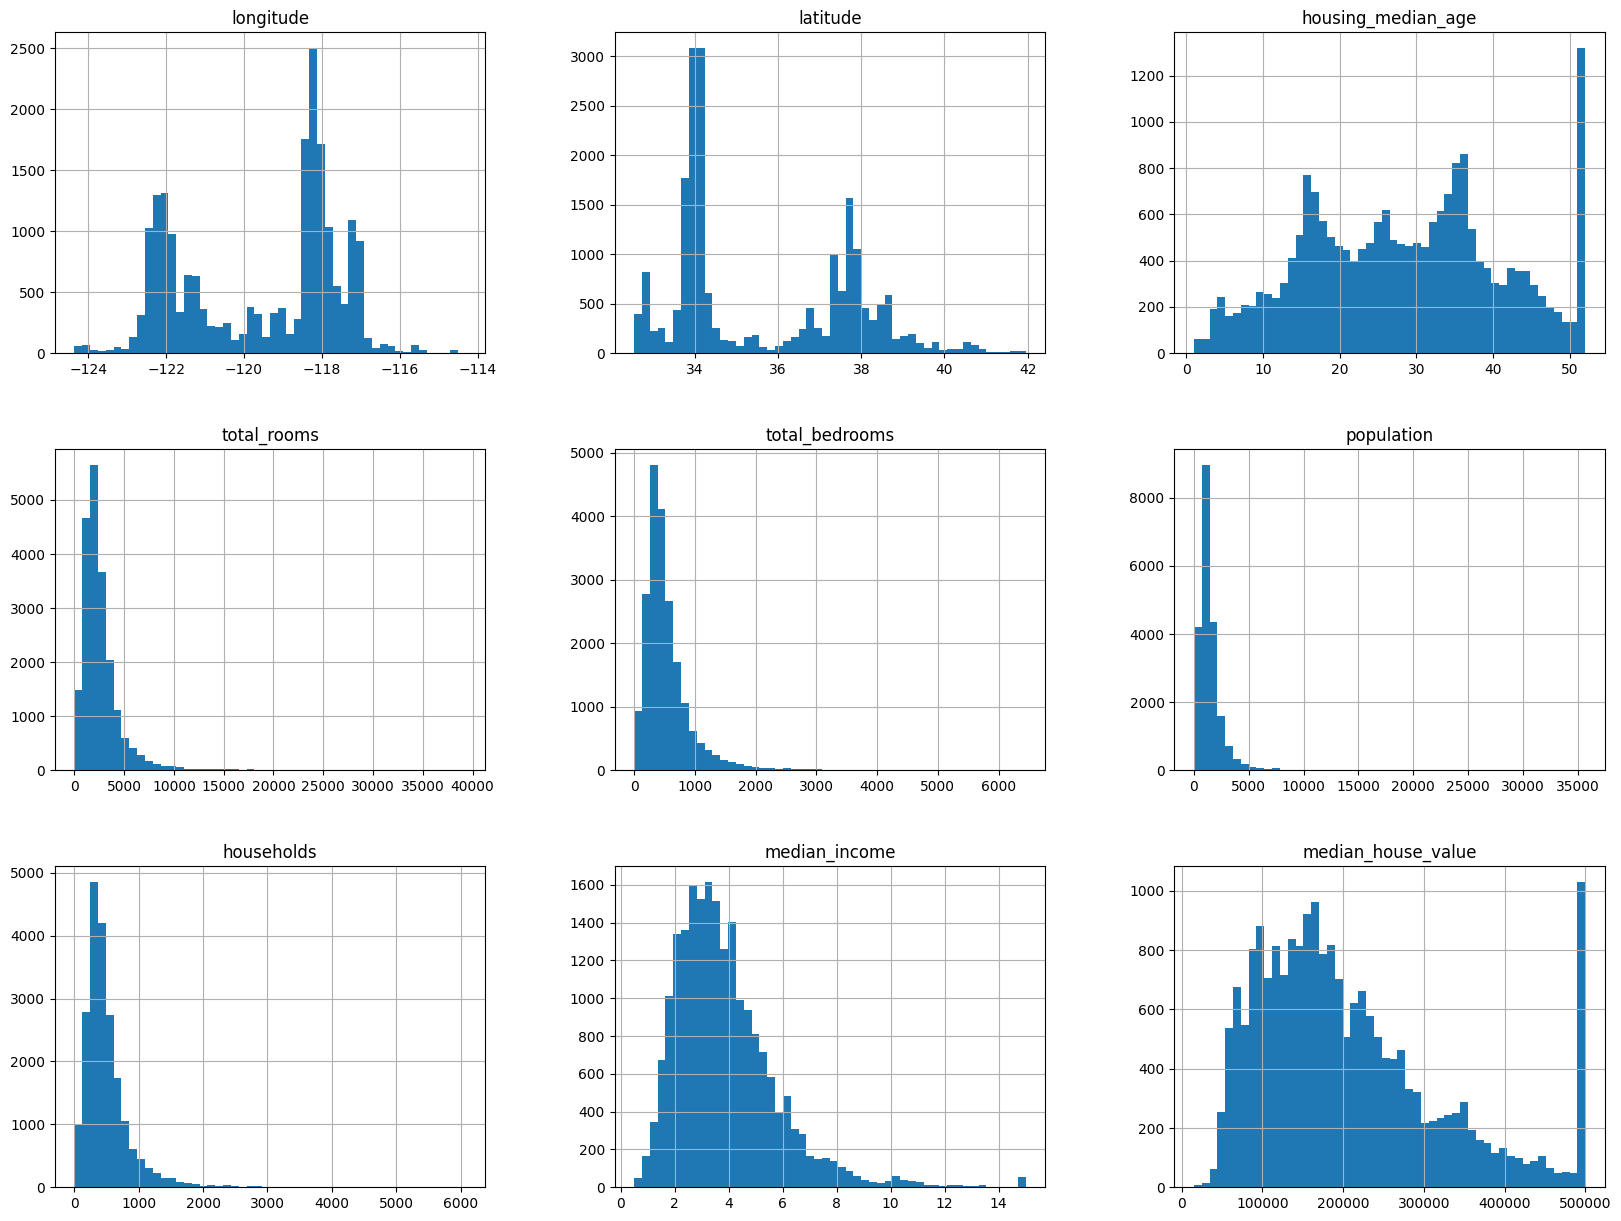

In [ ]:
#Plotar histograma das features
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Crie 5 categorias para representar `median_income`

Dica: use `pd.cut`

In [ ]:
#Criar 5 categorias para representar median_income

housing['income_cat'] = pd.cut(housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

## Cheque o `value_counts` de cada categoria

In [ ]:
#Checar o value_counts de cada categoria

housing['income_cat'].value_counts()

,count
income_cat,
3,7236
2,6581
4,3639
5,2362
1,822


## Plote um histograma da coluna criada

<Axes: >

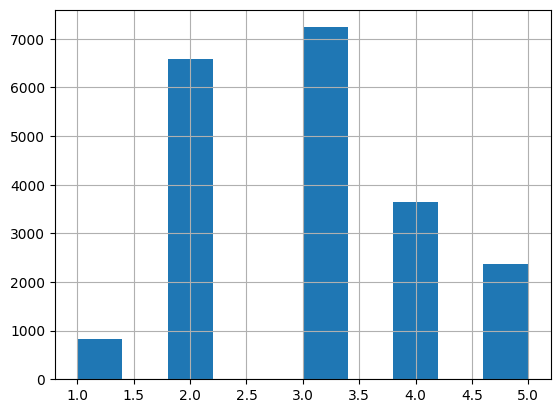

In [ ]:
#Histograma da coluna income_cat

housing['income_cat'].hist()

# Crie um split de treino e teste

- `train_test_split` ou `StratifiedShuffleSplit` por `income_cat`

In [ ]:
#Split de treino

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
#ou

In [ ]:
#Split de teste

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)



## Remova a coluna criada `income_cat` dos conjuntos de treino e teste

In [ ]:
#Remover coluna income_cat do conjunto de treino e teste

for set_ in (train_set, test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# Hora de fazer EDA!

## Crie uma cópia do `train_set`

In [ ]:
#Criar cópia do train_set

housing = train_set.copy()

## Visualize a latidude (y) e longitude (x) em um `scatter` plot

<Axes: xlabel='longitude', ylabel='latitude'>

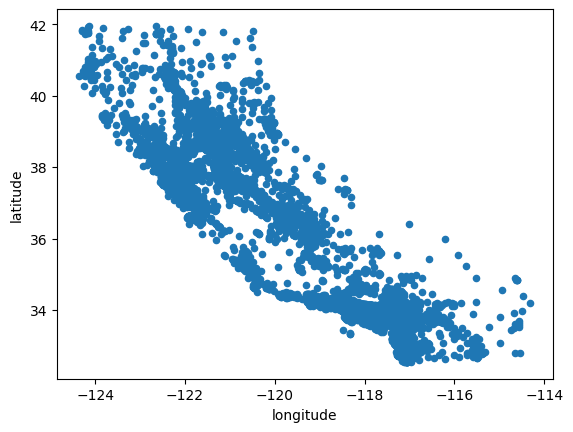

In [ ]:
#Visualizar latidude e longitude com scatter plot

housing.plot(kind='scatter', x='longitude', y='latitude')

## Altere o alpha para observar a densidade

<Axes: xlabel='longitude', ylabel='latitude'>

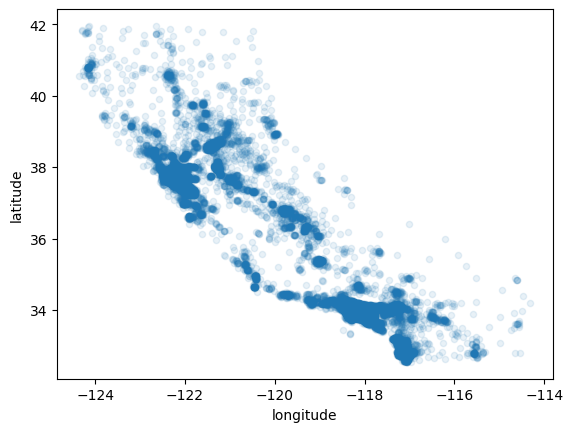

In [ ]:
#Aterando o alpha para observar a densidade

housing.plot.scatter(x='longitude', y='latitude', alpha=0.1)

## Também é possivel utilizar parâmetros como `s`, `c` e `cmap`

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html

<Axes: xlabel='longitude', ylabel='latitude'>

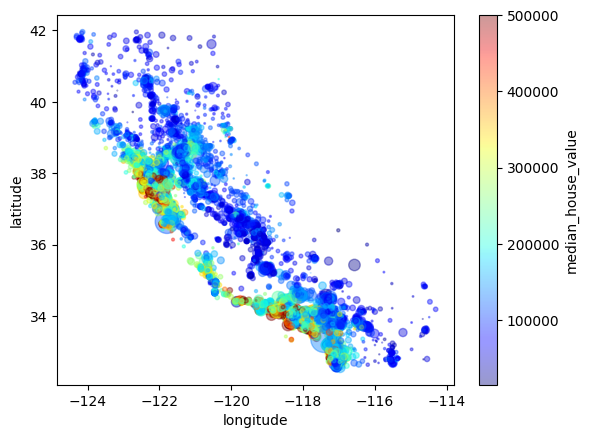

In [ ]:
#Adicionando outros parâmetros s, c e cmap

housing.plot.scatter(x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, c='median_house_value', cmap=plt.get_cmap('jet'))

## Procure por correlações

## Não esqueça de remover a coluna categórica

In [ ]:
#Remover coluna categórica

housing_num = housing.drop("ocean_proximity", axis=1)

## Crie a matriz de correlação

In [ ]:
#Criar matriz de correlação

corr_matrix = housing_num.corr()

## Imprima a correlação da label `median_house_value` em relação as outras features

In [ ]:
#Correlação da median_house_value com as demais features

corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.690647
total_rooms,0.133989
housing_median_age,0.103706
households,0.063714
total_bedrooms,0.047980
population,-0.026032
longitude,-0.046349
latitude,-0.142983


## Outra possibilidade é visualizar por meio do `scatter_matrix` do pandas!

Faça uma `scatter_matrix` com as features que considera mais importantes

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

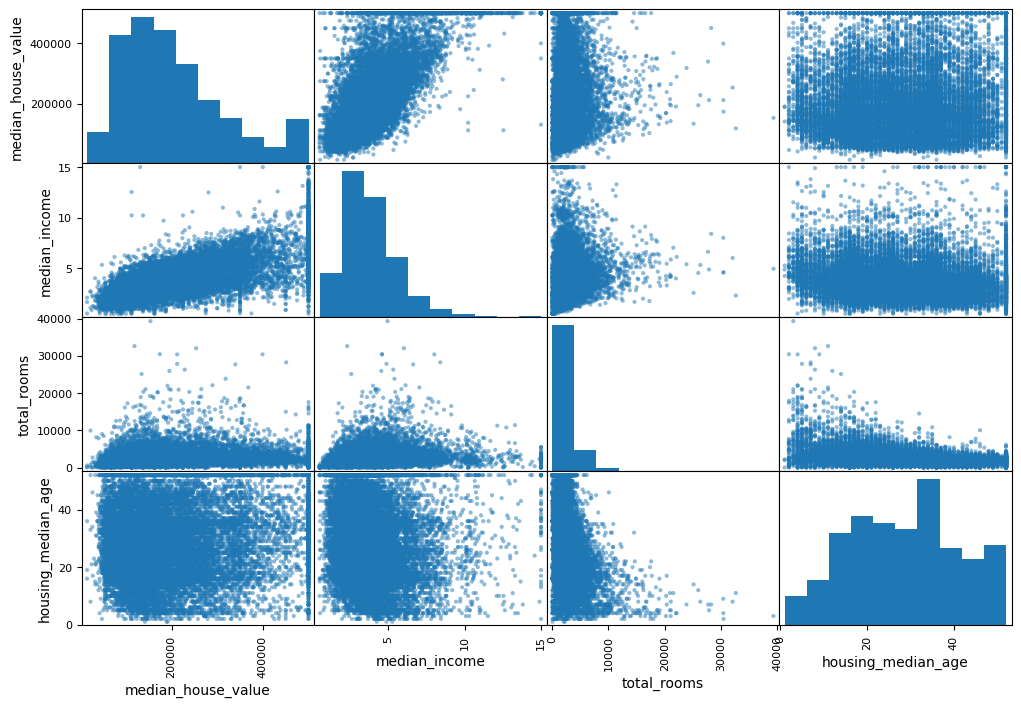

In [ ]:
#Criando scatter_matrix com as features com correlação maior que 0.1

from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

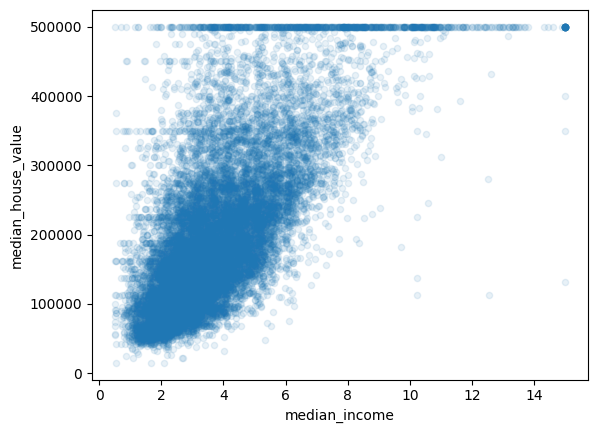

In [ ]:
#Scatter matrix entre median_house_value e median_income

housing.plot.scatter(x='median_income', y='median_house_value', alpha=0.1)

## Feature Engineering! Vamos criar atributos que possam ser relevantes

Crie alguns atributos:
- rooms_per_household
- bedrooms_per_room
- population_per_household

---



In [ ]:
#Criar novos atributos: rooms_per_household, bedrooms_per_room e population_per_household

housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

Visualize a correlação desses novos atributos com a label `median_house_value`

In [ ]:
#Correlação dos atributos com medin_house_value

corr_matrix = housing.select_dtypes(include=['number']).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.690647
rooms_per_household,0.158485
total_rooms,0.133989
housing_median_age,0.103706
households,0.063714
total_bedrooms,0.047980
population_per_household,-0.022030
population,-0.026032
longitude,-0.046349


<Axes: xlabel='rooms_per_household', ylabel='median_house_value'>

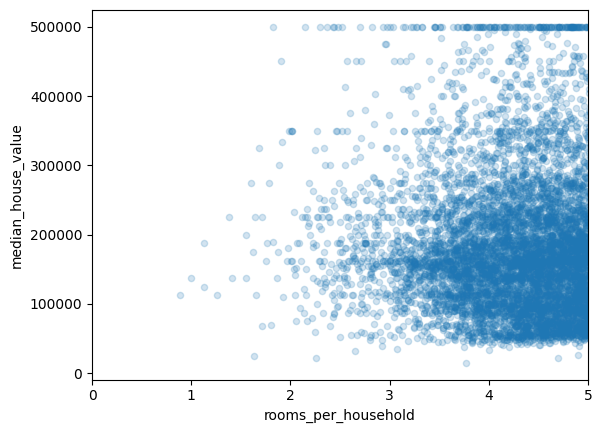

In [ ]:
#Scatter matrix entre median_house_value e room_per_household

housing.plot.scatter(x='rooms_per_household', y='median_house_value', alpha=0.2, xlim=(0, 5))

# Prepare os dados para aplicar ML

Não se esquecça de remover a label do nosso conjunto de treino, criando `X (housing)` e `y (housing_labels)`

In [ ]:
#Preparação de dados para ML
#remover a label do conjunto de treino, criando X (housing) e y (housing_labels)

housing = train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

## Limpeza de dados

Podemos trabalhar com a limpeza das colunas de três maneiras diferentes

```python
housing.dropna(subset=["total_bedrooms"])    # opção 1
housing.drop("total_bedrooms", axis=1)       # opção 2
median = housing["total_bedrooms"].median()  # opção 3
housing["total_bedrooms"].fillna(median, inplace=True)
```
- n1 remove todas as rows com valores faltantes em `total_bedrooms`
- n2 remove a coluna `total_bedrooms`
- n3 imputa a mediana nos valores faltantes


Escolha seu bias! :)

In [ ]:
#Imputar a mediana dos valores faltantes

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

## Lidando com atributos categóricos

Temos que processar a feature `ocean_proximity`. Ela é categórica e temos algumas formas de tratar esse valor antes de usar os modelos

In [ ]:
housing_cat['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,7341
INLAND,5227
NEAR OCEAN,2086
NEAR BAY,1854
ISLAND,4


## Podemos usar o `Ordinal Encoder` ou o `OneHotEncoder` para fazer isso

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

Vamos testar o `OrdinalEncoder`

In [ ]:
#OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.]])

Para visualizar as categorias e seus índices, utilize a propriedade `categories_` do `OrdinalEnconder`

In [ ]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Vamos para o `OneHotEncoder`

In [ ]:
# OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Vamos utilizar o mesmo atributo para visualizar as categorias e sua ordem

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Trabalhando com o modelo

Até agora fizemos 80% do trabalho de machine learning - preparar dados.

Para facilitar os proximos passos, vocês vão utilizar o seguinte codigo para criar por meio de scikitlearn pipelines o dataset
- Iremos adicionar a mediana para preencher valores faltantes
- Aquelas colunas que criamos anteriormente também farão parte do dataset
- Precisamos normalizar os dados numéricos para termos mais estabilidade númerica.

Se você não entendeu muito desse código não se preocupe. Vá para a criação do modelo!

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): #
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs =  list(housing_num.drop('median_house_value', axis=1))
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

Esse é nosso dataset para treino!

In [ ]:
housing_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
housing_prepared.shape

(16512, 16)

# Selecione e treine três modelos!

Das aulas assíncronas, escolha três modelos e calcule suas métricas de erro. Algumas dicas:
- `from sklearn.metrics import mean_squared_error`
- `from sklearn.metrics import mean_absolute_error`


Seu X é `housing_prepared` e seu Y é `housing_labels`

Não apenas use os métodos, mas escolha alguns parâmetros que o scikitlearn oferece para alterar. Ler a documentação é encorajado! :)

## Primeiro modelo

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, test_size=0.30, random_state=42)


In [ ]:
#LinearRegression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
predicao = lin_reg.predict(X_test)

In [ ]:
y_test.values

array([ 96700.,  75500., 430900., ..., 408500., 154600., 266700.])

Comparando com os valores reais:

In [ ]:
predicao

array([137305.40782087, 130373.01965008, 301813.20881032, ...,
       302442.58989243, 173400.83898277, 190686.03460987])

MSE e RMSE

In [ ]:
# MSE e RMSE

import numpy as np
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, predicao)
lin_rmse = np.sqrt(lin_mse)
print('MSE:', lin_mse)
print('RMSE:', lin_rmse)


MSE: 4498012587.109441
RMSE: 67067.22438799328


MAE

In [ ]:
#MAE

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, predicao)
print('MAE:', lin_mae)

MAE: 48704.11046661625


## Segundo modelo

In [ ]:
# prompt: fazer esse segundo modelo de machine learning utilizando agora o modelo Random Forest

import numpy as np
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
predicao_forest = forest_reg.predict(X_test)

# MSE e RMSE
forest_mse = mean_squared_error(y_test, predicao_forest)
forest_rmse = np.sqrt(forest_mse)
print('MSE:', forest_mse)
print('RMSE:', forest_rmse)

# MAE
forest_mae = mean_absolute_error(y_test, predicao_forest)
print('MAE:', forest_mae)


MSE: 336260024.4677694
RMSE: 18337.3941569616
MAE: 11867.563360920469


## Terceiro modelo

In [ ]:
# prompt: para o terceiro modelo utilizar XGBoost

import numpy as np
#XGBoost
!pip install xgboost
import xgboost as xgb

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(housing_prepared, housing_labels)
predicao_xgb = xgb_reg.predict(X_test)

# MSE e RMSE
xgb_mse = mean_squared_error(y_test, predicao_xgb)
xgb_rmse = np.sqrt(xgb_mse)
print('MSE:', xgb_mse)
print('RMSE:', xgb_rmse)

# MAE
xgb_mae = mean_absolute_error(y_test, predicao_xgb)
print('MAE:', xgb_mae)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
# Comparando as métricas dos três modelos:
print("Linear Regression:")
print("MSE:", lin_mse)
print("RMSE:", lin_rmse)
print("MAE:", lin_mae)
print("\n")

print("Random Forest Regressor:")
print("MSE:", forest_mse)
print("RMSE:", forest_rmse)
print("MAE:", forest_mae)
print("\n")

print("XGBoost Regressor:")
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)
print("MAE:", xgb_mae)


Linear Regression:
MSE: 4498012587.109441
RMSE: 67067.22438799328
MAE: 48704.11046661625


Random Forest Regressor:
MSE: 336260024.4677694
RMSE: 18337.3941569616
MAE: 11867.563360920469


XGBoost Regressor:
MSE: 715478447.3544526
RMSE: 26748.428876374266
MAE: 18758.608721329987
